In [86]:
#Alec Arroyo
#Final project

#This contains two datasets: 
#Dataset 1 : https://www.kaggle.com/datasets/niharika41298/nutrition-details-for-most-common-foods
#Dataset 2 : https://www.kaggle.com/datasets/trolukovich/nutritional-values-for-common-foods-and-products

#This project was looking at calories in each dataset and creating visuals and trying to predict calories
#Then we took a look at dataset 2 and broke all the calories down into 5 groups:
#1: Low
#2: Medium Low
#3: Medium
#4: Medium High
#5: High

#Then we ran a random forest on the model to predict what calorie category a food was in
#Ran to 95% accuracy

In [313]:
import pandas as pd
import statsmodels.formula.api as smf
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
import warnings
import numpy as np
from scipy.stats import uniform
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from pandasql import sqldf
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
import re
#Neural networks
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
import time

In [3]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore")

In [104]:
file = pd.read_csv('/Users/alec_arroyo/Downloads/nutrients_csvfile 2.csv')

In [105]:
len(file)

335

In [106]:
file

,Food,Measure,Grams,Calories,Protein,Fat,Sat.Fat,Fiber,Carbs,Category
0,Cows' milk,1 qt.,976,660,32,40,36,0,48,Dairy products
1,Milk skim,1 qt.,984,360,36,t,t,0,52,Dairy products
2,Buttermilk,1 cup,246,127,9,5,4,0,13,Dairy products
3,"Evaporated, undiluted",1 cup,252,345,16,20,18,0,24,Dairy products
4,Fortified milk,6 cups,"1,419","1,373",89,42,23,1.4,119,Dairy products
5,Powdered milk,1 cup,103,515,27,28,24,0,39,Dairy products
6,"skim, instant",1 1/3 cups,85,290,30,t,t,0,42,Dairy products
7,"skim, non-instant",2/3 cup,85,290,30,t,t,1,42,Dairy products
8,Goats' milk,1 cup,244,165,8,10,8,0,11,Dairy products
9,(1/2 cup ice cream),2 cups,540,690,24,24,22,0,70,Dairy products


In [107]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Food      335 non-null    object
 1   Measure   335 non-null    object
 2   Grams     335 non-null    object
 3   Calories  334 non-null    object
 4   Protein   335 non-null    object
 5   Fat       335 non-null    object
 6   Sat.Fat   333 non-null    object
 7   Fiber     335 non-null    object
 8   Carbs     335 non-null    object
 9   Category  335 non-null    object
dtypes: object(10)
memory usage: 26.3+ KB


In [108]:
file.isna().sum()

Food        0
Measure     0
Grams       0
Calories    1
Protein     0
Fat         0
Sat.Fat     2
Fiber       0
Carbs       0
Category    0
dtype: int64

In [109]:
file = file.rename(columns = {'Sat.Fat':'Sat_Fat'})

In [110]:
#replace dashes with 0
file['Calories'] = file['Calories'].apply(lambda x: "844" if x == "8-44" else x)

#format Calories into int number
file['Calories'] = file['Calories'].replace("[$,]", "", regex=True).astype(float)

#replace zeros with mean value
file['Calories']=file['Calories'].replace(0,file['Calories'].mean())

#####################PROTEIN#######################

#replace dashes with 0
file['Protein'] = file['Protein'].apply(lambda x: "0" if x == "t" else x)

#format Protein into int number
file['Protein'] = file['Protein'].replace("[$,]", "", regex=True).astype(float)

#replace zeros with mean value
file['Protein']=file['Protein'].replace(0,file['Protein'].mean())


#####################Fat#######################

#replace dashes with 0
file['Fat'] = file['Fat'].apply(lambda x: "0" if x == "t" or x == "t'" else x)

#format Fat into int number
file['Fat'] = file['Fat'].replace("[$,]", "", regex=True).astype(float)

#replace zeros with mean value
file['Fat']=file['Fat'].replace(0,file['Fat'].mean())


#####################Sat_Fat#######################

#replace dashes with 0
file['Sat_Fat'] = file['Sat_Fat'].apply(lambda x: "0" if x == "t" else x)

#format Sat_Fat into int number
file['Sat_Fat'] = file['Sat_Fat'].replace("[$,]", "", regex=True).astype(float)

#replace zeros with mean value
file['Sat_Fat']=file['Sat_Fat'].replace(0,file['Sat_Fat'].mean())

#####################Fiber#######################

#replace dashes with 0
file['Fiber'] = file['Fiber'].apply(lambda x: "0" if x == "t" or x == "a" else x)

#format Fiber into int number
file['Fiber'] = file['Fiber'].replace("[$,]", "", regex=True).astype(float)


#####################Carbs#######################

#replace dashes with 0
file['Carbs'] = file['Carbs'].apply(lambda x: "0" if x == "t" else x)

#format Carbs into int number
file['Carbs'] = file['Carbs'].replace("[$,]", "", regex=True).astype(float)

#replace zeros with mean value
file['Carbs']=file['Carbs'].replace(0,file['Carbs'].mean())

#####################Grams#######################

#format Grams into int number
file['Grams'] = file['Grams'].replace("[$,]", "", regex=True).astype(int)


In [111]:
#replace NAN for Cal with mean
file['Calories'] = file['Calories'].fillna(file['Calories'].mean())

In [112]:
#replace NAN for Sat_Fat with mean
file['Sat_Fat'] = file['Sat_Fat'].fillna(file['Sat_Fat'].mean())

In [113]:
#Should be no NANs
file.isna().sum()

Food        0
Measure     0
Grams       0
Calories    0
Protein     0
Fat         0
Sat_Fat     0
Fiber       0
Carbs       0
Category    0
dtype: int64

In [114]:
en = LabelEncoder()

In [115]:
file['Measure'] = en.fit_transform(file['Measure'])

In [116]:
file

,Food,Measure,Grams,Calories,Protein,Fat,Sat_Fat,Fiber,Carbs,Category
0,Cows' milk,13,976,660.000000,32.000000,40.000000,36.000000,0.00,48.000000,Dairy products
1,Milk skim,13,984,360.000000,36.000000,8.540299,6.438438,0.00,52.000000,Dairy products
2,Buttermilk,3,246,127.000000,9.000000,5.000000,4.000000,0.00,13.000000,Dairy products
3,"Evaporated, undiluted",3,252,345.000000,16.000000,20.000000,18.000000,0.00,24.000000,Dairy products
4,Fortified milk,52,1419,1373.000000,89.000000,42.000000,23.000000,1.40,119.000000,Dairy products
5,Powdered milk,3,103,515.000000,27.000000,28.000000,24.000000,0.00,39.000000,Dairy products
6,"skim, instant",1,85,290.000000,30.000000,8.540299,6.438438,0.00,42.000000,Dairy products
7,"skim, non-instant",41,85,290.000000,30.000000,8.540299,6.438438,1.00,42.000000,Dairy products
8,Goats' milk,3,244,165.000000,8.000000,10.000000,8.000000,0.00,11.000000,Dairy products
9,(1/2 cup ice cream),35,540,690.000000,24.000000,24.000000,22.000000,0.00,70.000000,Dairy products


In [117]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 335 entries, 0 to 334
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Food      335 non-null    object 
 1   Measure   335 non-null    int64  
 2   Grams     335 non-null    int64  
 3   Calories  335 non-null    float64
 4   Protein   335 non-null    float64
 5   Fat       335 non-null    float64
 6   Sat_Fat   335 non-null    float64
 7   Fiber     335 non-null    float64
 8   Carbs     335 non-null    float64
 9   Category  335 non-null    object 
dtypes: float64(6), int64(2), object(2)
memory usage: 26.3+ KB


In [118]:


testitout = file

#make Category an int type for linear regression
testitout = testitout.replace({'Category':{'Dairy products':'0'}})
testitout = testitout.replace({'Category':{'Fats, Oils, Shortenings':'1'}})
testitout = testitout.replace({'Category':{'Meat, Poultry':'2'}})
testitout = testitout.replace({'Category':{'Fish, Seafood':'3'}})
testitout = testitout.replace({'Category':{'Vegetables A-E':'4'}})
testitout = testitout.replace({'Category':{'Vegetables F-P':'4'}})
testitout = testitout.replace({'Category':{'Vegetables R-Z':'4'}})
testitout = testitout.replace({'Category':{'Fruits A-F':'5'}})
testitout = testitout.replace({'Category':{'Fruits G-P':'5'}})
testitout = testitout.replace({'Category':{'Fruits R-Z':'5'}})
testitout = testitout.replace({'Category':{'Breads, cereals, fastfood,grains':'6'}})
testitout = testitout.replace({'Category':{'Desserts, sweets':'7'}})
testitout = testitout.replace({'Category':{'Jams, Jellies':'8'}})
testitout = testitout.replace({'Category':{'Seeds and Nuts':'9'}})
testitout = testitout.replace({'Category':{'Drinks,Alcohol, Beverages':'10'}})
testitout = testitout.replace({'Category':{'Soups':'11'}})



In [119]:
#format Category into int number
testitout['Category'] = testitout['Category'].replace("[$,]", "", regex=True).astype(int)

In [120]:
testitout.head()

,Food,Measure,Grams,Calories,Protein,Fat,Sat_Fat,Fiber,Carbs,Category
0,Cows' milk,13,976,660.0,32.0,40.000000,36.000000,0.0,48.0,0
1,Milk skim,13,984,360.0,36.0,8.540299,6.438438,0.0,52.0,0
2,Buttermilk,3,246,127.0,9.0,5.000000,4.000000,0.0,13.0,0
3,"Evaporated, undiluted",3,252,345.0,16.0,20.000000,18.000000,0.0,24.0,0
4,Fortified milk,52,1419,1373.0,89.0,42.000000,23.000000,1.4,119.0,0


In [121]:
#WORK ON THIS BEEFORE RUNNING MODEL

#Have to create a new field representing categorical field 
#ex: Fruits R-Z = 0, Vegetables A-E = 1, etc


In [127]:


newtest = file

#make Category an int type for linear regression
newtest = newtest.replace({'Category':{'Dairy products':'Dairy'}})
newtest = newtest.replace({'Category':{'Fats, Oils, Shortenings':'Oils'}})
newtest = newtest.replace({'Category':{'Meat, Poultry':'Meat'}})
newtest = newtest.replace({'Category':{'Fish, Seafood':'Seafood'}})
newtest = newtest.replace({'Category':{'Vegetables A-E':'Vegetables'}})
newtest = newtest.replace({'Category':{'Vegetables F-P':'Vegetables'}})
newtest = newtest.replace({'Category':{'Vegetables R-Z':'Vegetables'}})
newtest = newtest.replace({'Category':{'Fruits A-F':'Fruits'}})
newtest = newtest.replace({'Category':{'Fruits G-P':'Fruits'}})
newtest = newtest.replace({'Category':{'Fruits R-Z':'Fruits'}})
newtest = newtest.replace({'Category':{'Breads, cereals, fastfood,grains':'Grains'}})
newtest = newtest.replace({'Category':{'Desserts, sweets':'Sweets'}})
newtest = newtest.replace({'Category':{'Jams, Jellies':'Jams'}})
newtest = newtest.replace({'Category':{'Seeds and Nuts':'Nuts'}})
newtest = newtest.replace({'Category':{'Drinks,Alcohol, Beverages':'Beverages'}})
newtest = newtest.replace({'Category':{'Soups':'Soups'}})



In [146]:
new = sqldf('select count(*) as ct_cat, sum(calories)/100 as sum_cal, Category from newtest group by Category')

In [147]:
new

,ct_cat,sum_cal,Category
0,12,14.945030,Beverages
1,28,84.340000,Dairy
2,58,86.100000,Fruits
3,45,119.210000,Grains
4,8,13.450000,Jams
5,30,79.990000,Meat
6,12,40.890000,Nuts
7,14,36.290000,Oils
8,19,29.120000,Seafood
9,10,11.910000,Soups


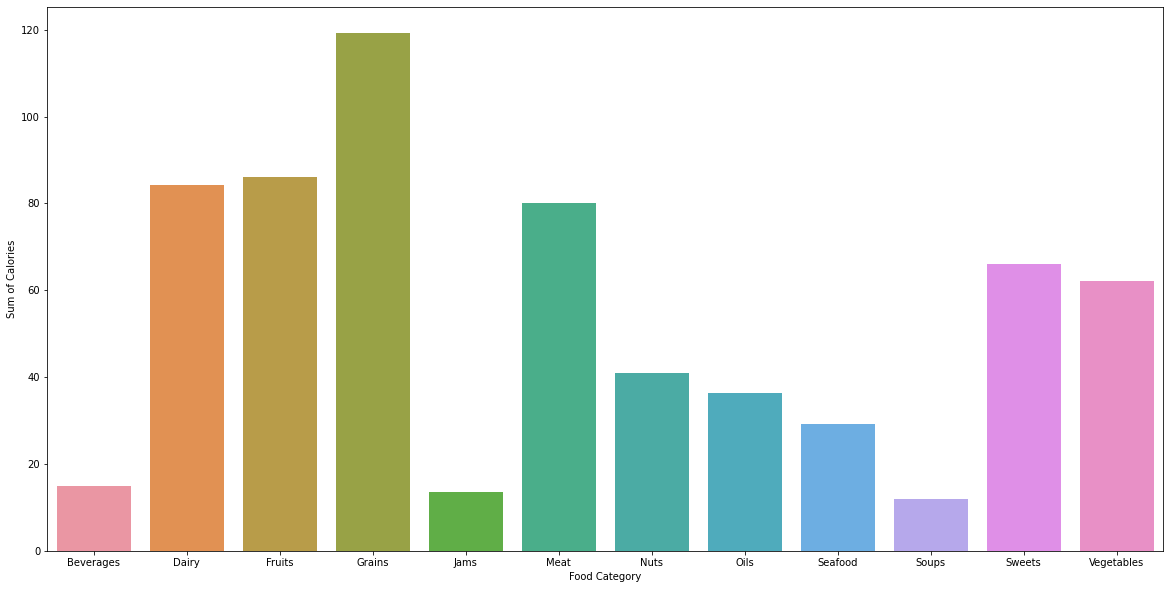

In [157]:
X = new['Category']
Y = new['ct_cat']
Z = new['sum_cal']

ax, fig = plt.subplots(figsize = (20, 10))
sns.barplot(X, Z)
#sns.scatterplot(data = newtest, x=Y, y=Z, hue =X)
plt.xlabel("Food Category")
plt.ylabel("Sum of Calories")
#plt.title("Sum of Calories by Food Category")
plt.show()

In [ ]:
#DATASET 2 USING CALORIES TO MAKE PREDICTIONS USING LINEAR REGRESSION

#THEN CATEGORIZING CALORIES INTO GROUPS AND RUNNING RANDOM FOREST MODEL

In [4]:
#TRY BIGGER DATASET

In [5]:
#calories is the variable we're trying to predict

In [6]:
#then with predictions we see what foods are closely associated with calories

In [283]:
#Read in dataset
file = pd.read_csv('/Users/alec_arroyo/Downloads/nutrition 2.csv')

In [284]:
#Set all nulls to str value of 0
file['saturated_fat'] = file['saturated_fat'].fillna('0')

In [286]:
#FYI this takes about 20 min to run

#Iterate and use regex expressions to remove everything but numbers and decimals
for i in range(len(file)):
    file['total_fat'][i] = re.sub(r'(.*\d).*', r'\1', file['total_fat'][i])
    file['saturated_fat'][i] = re.sub(r'(.*\d).*', r'\1', file['saturated_fat'][i])
    file['cholesterol'][i] = re.sub(r'(.*\d).*', r'\1', file['cholesterol'][i])
    file['sodium'][i] = re.sub(r'(.*\d).*', r'\1', file['sodium'][i])
    file['choline'][i] = re.sub(r'(.*\d).*', r'\1', file['choline'][i])
    file['folate'][i] = re.sub(r'(.*\d).*', r'\1', file['folate'][i])
    file['folic_acid'][i] = re.sub(r'(.*\d).*', r'\1', file['folic_acid'][i])
    file['niacin'][i] = re.sub(r'(.*\d).*', r'\1', file['niacin'][i])
    file['pantothenic_acid'][i] = re.sub(r'(.*\d).*', r'\1', file['pantothenic_acid'][i])
    file['riboflavin'][i] = re.sub(r'(.*\d).*', r'\1', file['riboflavin'][i])
    file['thiamin'][i] = re.sub(r'(.*\d).*', r'\1', file['thiamin'][i])
    file['vitamin_a'][i] = re.sub(r'(.*\d).*', r'\1', file['vitamin_a'][i])
    file['vitamin_a_rae'][i] = re.sub(r'(.*\d).*', r'\1', file['vitamin_a_rae'][i])
    file['carotene_alpha'][i] = re.sub(r'(.*\d).*', r'\1', file['carotene_alpha'][i])
    file['carotene_beta'][i] = re.sub(r'(.*\d).*', r'\1', file['carotene_beta'][i])
    file['cryptoxanthin_beta'][i] = re.sub(r'(.*\d).*', r'\1', file['cryptoxanthin_beta'][i])
    file['lutein_zeaxanthin'][i] = re.sub(r'(.*\d).*', r'\1', file['lutein_zeaxanthin'][i])
    file['vitamin_b12'][i] = re.sub(r'(.*\d).*', r'\1', file['vitamin_b12'][i])
    file['vitamin_b6'][i] = re.sub(r'(.*\d).*', r'\1', file['saturated_fat'][i])
    file['vitamin_c'][i] = re.sub(r'(.*\d).*', r'\1', file['vitamin_b6'][i])
    file['vitamin_d'][i] = re.sub(r'(.*\d).*', r'\1', file['vitamin_c'][i])
    file['vitamin_e'][i] = re.sub(r'(.*\d).*', r'\1', file['vitamin_d'][i])
    file['tocopherol_alpha'][i] = re.sub(r'(.*\d).*', r'\1', file['tocopherol_alpha'][i])
    file['vitamin_k'][i] = re.sub(r'(.*\d).*', r'\1', file['vitamin_k'][i])
    file['calcium'][i] = re.sub(r'(.*\d).*', r'\1', file['calcium'][i])
    file['copper'][i] = re.sub(r'(.*\d).*', r'\1', file['copper'][i])
    file['irom'][i] = re.sub(r'(.*\d).*', r'\1', file['irom'][i])
    file['magnesium'][i] = re.sub(r'(.*\d).*', r'\1', file['magnesium'][i])
    file['manganese'][i] = re.sub(r'(.*\d).*', r'\1', file['manganese'][i])
    file['phosphorous'][i] = re.sub(r'(.*\d).*', r'\1', file['phosphorous'][i])
    file['potassium'][i] = re.sub(r'(.*\d).*', r'\1', file['potassium'][i])
    file['selenium'][i] = re.sub(r'(.*\d).*', r'\1', file['selenium'][i])
    file['zink'][i] = re.sub(r'(.*\d).*', r'\1', file['zink'][i])
    file['protein'][i] = re.sub(r'(.*\d).*', r'\1', file['protein'][i])
    file['alanine'][i] = re.sub(r'(.*\d).*', r'\1', file['alanine'][i])
    file['arginine'][i] = re.sub(r'(.*\d).*', r'\1', file['arginine'][i])
    file['aspartic_acid'][i] = re.sub(r'(.*\d).*', r'\1', file['aspartic_acid'][i])
    file['threonine'][i] = re.sub(r'(.*\d).*', r'\1', file['threonine'][i])
    file['tryptophan'][i] = re.sub(r'(.*\d).*', r'\1', file['tryptophan'][i])
    file['tyrosine'][i] = re.sub(r'(.*\d).*', r'\1', file['tyrosine'][i])
    file['valine'][i] = re.sub(r'(.*\d).*', r'\1', file['valine'][i])
    file['carbohydrate'][i] = re.sub(r'(.*\d).*', r'\1', file['carbohydrate'][i])
    file['fiber'][i] = re.sub(r'(.*\d).*', r'\1', file['fiber'][i])
    file['sugars'][i] = re.sub(r'(.*\d).*', r'\1', file['sugars'][i])
    file['galactose'][i] = re.sub(r'(.*\d).*', r'\1', file['galactose'][i])
    file['glucose'][i] = re.sub(r'(.*\d).*', r'\1', file['glucose'][i])
    file['lactose'][i] = re.sub(r'(.*\d).*', r'\1', file['lactose'][i])
    file['maltose'][i] = re.sub(r'(.*\d).*', r'\1', file['maltose'][i])
    file['sucrose'][i] = re.sub(r'(.*\d).*', r'\1', file['sucrose'][i])
    file['fat'][i] = re.sub(r'(.*\d).*', r'\1', file['fat'][i])
    file['saturated_fatty_acids'][i] = re.sub(r'(.*\d).*', r'\1', file['saturated_fatty_acids'][i])
    file['monounsaturated_fatty_acids'][i] = re.sub(r'(.*\d).*', r'\1', file['monounsaturated_fatty_acids'][i])
    file['polyunsaturated_fatty_acids'][i] = re.sub(r'(.*\d).*', r'\1', file['polyunsaturated_fatty_acids'][i])
    file['fatty_acids_total_trans'][i] = re.sub(r'(.*\d).*', r'\1', file['fatty_acids_total_trans'][i])
    file['alcohol'][i] = re.sub(r'(.*\d).*', r'\1', file['alcohol'][i])
    file['ash'][i] = re.sub(r'(.*\d).*', r'\1', file['ash'][i])
    file['caffeine'][i] = re.sub(r'(.*\d).*', r'\1', file['caffeine'][i])
    file['theobromine'][i] = re.sub(r'(.*\d).*', r'\1', file['theobromine'][i])
    file['water'][i] = re.sub(r'(.*\d).*', r'\1', file['water'][i])
    file['cystine'][i] = re.sub(r'(.*\d).*', r'\1', file['cystine'][i])
    file['glutamic_acid'][i] = re.sub(r'(.*\d).*', r'\1', file['glutamic_acid'][i])
    file['glycine'][i] = re.sub(r'(.*\d).*', r'\1', file['glycine'][i])
    file['histidine'][i] = re.sub(r'(.*\d).*', r'\1', file['histidine'][i])
    file['isoleucine'][i] = re.sub(r'(.*\d).*', r'\1', file['isoleucine'][i])
    file['leucine'][i] = re.sub(r'(.*\d).*', r'\1', file['leucine'][i])
    file['lysine'][i] = re.sub(r'(.*\d).*', r'\1', file['lysine'][i])
    file['methionine'][i] = re.sub(r'(.*\d).*', r'\1', file['methionine'][i])
    file['phenylalanine'][i] = re.sub(r'(.*\d).*', r'\1', file['phenylalanine'][i])
    file['proline'][i] = re.sub(r'(.*\d).*', r'\1', file['proline'][i])
    file['serine'][i] = re.sub(r'(.*\d).*', r'\1', file['serine'][i])
    file['fructose'][i] = re.sub(r'(.*\d).*', r'\1', file['fructose'][i])
    


In [287]:
#remove this bad column
file = file.loc[:, file.columns != 'hydroxyproline']


In [288]:
file.head()

,Unnamed: 0,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,riboflavin,thiamin,vitamin_a,vitamin_a_rae,carotene_alpha,carotene_beta,cryptoxanthin_beta,lutein_zeaxanthin,lucopene,vitamin_b12,vitamin_b6,vitamin_c,vitamin_d,vitamin_e,tocopherol_alpha,vitamin_k,calcium,copper,irom,magnesium,manganese,phosphorous,potassium,selenium,zink,protein,alanine,arginine,aspartic_acid,cystine,glutamic_acid,glycine,histidine,isoleucine,leucine,lysine,methionine,phenylalanine,proline,serine,threonine,tryptophan,tyrosine,valine,carbohydrate,fiber,sugars,fructose,galactose,glucose,lactose,maltose,sucrose,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,0,Cornstarch,100 g,381,0.1,0,0,9.00,0.4,0.00,0.00,0.000,0.000,0.000,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0,0,0,0.00,0.0,2.00,0.050,0.47,3.00,0.053,13.00,3.00,2.8,0.06,0.26,0.019,0.012,0.020,0.006,0.053,0.009,0.008,0.010,0.036,0.006,0.006,0.013,0.024,0.012,0.009,0.001,0.010,0.014,91.27,0.9,0.00,0,0,0,0,0,0,0.05,0.009,0.016,0.025,0.00,0.0,0.09,0.00,0.00,8.32
1,1,"Nuts, pecans",100 g,691,72,6.2,0,0.00,40.5,22.00,0.00,1.167,0.863,0.130,0.660,56.00,3.00,0.00,29.00,9.00,17.00,0,0.00,6.2,6.2,6.2,6.2,1.40,3.5,70.00,1.200,2.53,121.00,4.500,277.00,410.00,3.8,4.53,9.17,0.397,1.177,0.929,0.152,1.829,0.453,0.262,0.336,0.598,0.287,0.183,0.426,0.363,0.474,0.306,0.093,0.215,0.411,13.86,9.6,3.97,0.04,0,0.04,0.00,0.00,3.90,71.97,6.180,40.801,21.614,0.00,0.0,1.49,0.00,0.00,3.52
2,2,"Eggplant, raw",100 g,25,0.2,0,0,2.00,6.9,22.00,0.00,0.649,0.281,0.037,0.039,23.00,1.00,0.00,14.00,0.00,36.00,0,0.00,0,0,0,0,0.30,3.5,9.00,0.081,0.23,14.00,0.232,24.00,229.00,0.3,0.16,0.98,0.051,0.057,0.164,0.006,0.186,0.041,0.023,0.045,0.064,0.047,0.011,0.043,0.043,0.042,0.037,0.009,0.027,0.053,5.88,3.0,3.53,1.54,0,1.58,0,0,0.26,0.18,0.034,0.016,0.076,0.00,0.0,0.66,0.00,0.00,92.30
3,3,"Teff, uncooked",100 g,367,2.4,0.4,0,12.00,13.1,0,0,3.363,0.942,0.270,0.390,9.00,0.00,0.00,5.00,0.00,66.00,0,0,0.4,0.4,0.4,0.4,0.08,1.9,180.00,0.810,7.63,184.00,9.240,429.00,427.00,4.4,3.63,13.30,0.747,0.517,0.820,0.236,3.349,0.477,0.301,0.501,1.068,0.376,0.428,0.698,0.664,0.622,0.510,0.139,0.458,0.686,73.13,8.0,1.84,0.47,0.00,0.73,0.00,0.01,0.62,2.38,0.449,0.589,1.071,0,0,2.37,0,0,8.82
4,4,"Sherbet, orange",100 g,144,2,1.2,1,46.00,7.7,4.00,0.00,0.063,0.224,0.097,0.027,46.00,12.00,0.00,1.00,5.00,7.00,0,0.13,1.2,1.2,1.2,1.2,0.01,0.0,54.00,0.028,0.14,8.00,0.011,40.00,96.00,1.5,0.48,1.10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30.40,1.3,24.32,0,0,0,0,0,0,2.00,1.160,0.530,0.080,1.00,0.0,0.40,0.00,0.00,66.10


In [289]:
#Dont tamper with original dataset
newfile = file

#removed serving size as its all the same at 100g - not needed for model
newfile = newfile.loc[:, newfile.columns != 'serving_size']

#rename id value
newfile = newfile.rename(columns = {"Unnamed: 0":"FoodID"})

In [290]:
newfile.head()

,FoodID,name,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,riboflavin,thiamin,vitamin_a,vitamin_a_rae,carotene_alpha,carotene_beta,cryptoxanthin_beta,lutein_zeaxanthin,lucopene,vitamin_b12,vitamin_b6,vitamin_c,vitamin_d,vitamin_e,tocopherol_alpha,vitamin_k,calcium,copper,irom,magnesium,manganese,phosphorous,potassium,selenium,zink,protein,alanine,arginine,aspartic_acid,cystine,glutamic_acid,glycine,histidine,isoleucine,leucine,lysine,methionine,phenylalanine,proline,serine,threonine,tryptophan,tyrosine,valine,carbohydrate,fiber,sugars,fructose,galactose,glucose,lactose,maltose,sucrose,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,0,Cornstarch,381,0.1,0,0,9.00,0.4,0.00,0.00,0.000,0.000,0.000,0.000,0.00,0.00,0.00,0.00,0.00,0.00,0,0.00,0,0,0,0,0.00,0.0,2.00,0.050,0.47,3.00,0.053,13.00,3.00,2.8,0.06,0.26,0.019,0.012,0.020,0.006,0.053,0.009,0.008,0.010,0.036,0.006,0.006,0.013,0.024,0.012,0.009,0.001,0.010,0.014,91.27,0.9,0.00,0,0,0,0,0,0,0.05,0.009,0.016,0.025,0.00,0.0,0.09,0.00,0.00,8.32
1,1,"Nuts, pecans",691,72,6.2,0,0.00,40.5,22.00,0.00,1.167,0.863,0.130,0.660,56.00,3.00,0.00,29.00,9.00,17.00,0,0.00,6.2,6.2,6.2,6.2,1.40,3.5,70.00,1.200,2.53,121.00,4.500,277.00,410.00,3.8,4.53,9.17,0.397,1.177,0.929,0.152,1.829,0.453,0.262,0.336,0.598,0.287,0.183,0.426,0.363,0.474,0.306,0.093,0.215,0.411,13.86,9.6,3.97,0.04,0,0.04,0.00,0.00,3.90,71.97,6.180,40.801,21.614,0.00,0.0,1.49,0.00,0.00,3.52
2,2,"Eggplant, raw",25,0.2,0,0,2.00,6.9,22.00,0.00,0.649,0.281,0.037,0.039,23.00,1.00,0.00,14.00,0.00,36.00,0,0.00,0,0,0,0,0.30,3.5,9.00,0.081,0.23,14.00,0.232,24.00,229.00,0.3,0.16,0.98,0.051,0.057,0.164,0.006,0.186,0.041,0.023,0.045,0.064,0.047,0.011,0.043,0.043,0.042,0.037,0.009,0.027,0.053,5.88,3.0,3.53,1.54,0,1.58,0,0,0.26,0.18,0.034,0.016,0.076,0.00,0.0,0.66,0.00,0.00,92.30
3,3,"Teff, uncooked",367,2.4,0.4,0,12.00,13.1,0,0,3.363,0.942,0.270,0.390,9.00,0.00,0.00,5.00,0.00,66.00,0,0,0.4,0.4,0.4,0.4,0.08,1.9,180.00,0.810,7.63,184.00,9.240,429.00,427.00,4.4,3.63,13.30,0.747,0.517,0.820,0.236,3.349,0.477,0.301,0.501,1.068,0.376,0.428,0.698,0.664,0.622,0.510,0.139,0.458,0.686,73.13,8.0,1.84,0.47,0.00,0.73,0.00,0.01,0.62,2.38,0.449,0.589,1.071,0,0,2.37,0,0,8.82
4,4,"Sherbet, orange",144,2,1.2,1,46.00,7.7,4.00,0.00,0.063,0.224,0.097,0.027,46.00,12.00,0.00,1.00,5.00,7.00,0,0.13,1.2,1.2,1.2,1.2,0.01,0.0,54.00,0.028,0.14,8.00,0.011,40.00,96.00,1.5,0.48,1.10,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,30.40,1.3,24.32,0,0,0,0,0,0,2.00,1.160,0.530,0.080,1.00,0.0,0.40,0.00,0.00,66.10


In [291]:
#convert fields to float
c = 0
for i in range(len(newfile)):
    if i == 0 or i == 1:
        c = c
    else:
        newfile[newfile.columns[i]] = newfile[newfile.columns[i]].astype(float)

IndexError: index 75 is out of bounds for axis 0 with size 75

In [292]:
newfile.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8789 entries, 0 to 8788
Data columns (total 75 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   FoodID                       8789 non-null   int64  
 1   name                         8789 non-null   object 
 2   calories                     8789 non-null   float64
 3   total_fat                    8789 non-null   float64
 4   saturated_fat                8789 non-null   float64
 5   cholesterol                  8789 non-null   float64
 6   sodium                       8789 non-null   float64
 7   choline                      8789 non-null   float64
 8   folate                       8789 non-null   float64
 9   folic_acid                   8789 non-null   float64
 10  niacin                       8789 non-null   float64
 11  pantothenic_acid             8789 non-null   float64
 12  riboflavin                   8789 non-null   float64
 13  thiamin           

In [293]:
newfile.head()

,FoodID,name,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,riboflavin,thiamin,vitamin_a,vitamin_a_rae,carotene_alpha,carotene_beta,cryptoxanthin_beta,lutein_zeaxanthin,lucopene,vitamin_b12,vitamin_b6,vitamin_c,vitamin_d,vitamin_e,tocopherol_alpha,vitamin_k,calcium,copper,irom,magnesium,manganese,phosphorous,potassium,selenium,zink,protein,alanine,arginine,aspartic_acid,cystine,glutamic_acid,glycine,histidine,isoleucine,leucine,lysine,methionine,phenylalanine,proline,serine,threonine,tryptophan,tyrosine,valine,carbohydrate,fiber,sugars,fructose,galactose,glucose,lactose,maltose,sucrose,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,0,Cornstarch,381.0,0.1,0.0,0.0,9.0,0.4,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,2.0,0.050,0.47,3.0,0.053,13.0,3.0,2.8,0.06,0.26,0.019,0.012,0.020,0.006,0.053,0.009,0.008,0.010,0.036,0.006,0.006,0.013,0.024,0.012,0.009,0.001,0.010,0.014,91.27,0.9,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.05,0.009,0.016,0.025,0.0,0.0,0.09,0.0,0.0,8.32
1,1,"Nuts, pecans",691.0,72.0,6.2,0.0,0.0,40.5,22.0,0.0,1.167,0.863,0.130,0.660,56.0,3.0,0.0,29.0,9.0,17.0,0.0,0.00,6.2,6.2,6.2,6.2,1.40,3.5,70.0,1.200,2.53,121.0,4.500,277.0,410.0,3.8,4.53,9.17,0.397,1.177,0.929,0.152,1.829,0.453,0.262,0.336,0.598,0.287,0.183,0.426,0.363,0.474,0.306,0.093,0.215,0.411,13.86,9.6,3.97,0.04,0.0,0.04,0.0,0.00,3.90,71.97,6.180,40.801,21.614,0.0,0.0,1.49,0.0,0.0,3.52
2,2,"Eggplant, raw",25.0,0.2,0.0,0.0,2.0,6.9,22.0,0.0,0.649,0.281,0.037,0.039,23.0,1.0,0.0,14.0,0.0,36.0,0.0,0.00,0.0,0.0,0.0,0.0,0.30,3.5,9.0,0.081,0.23,14.0,0.232,24.0,229.0,0.3,0.16,0.98,0.051,0.057,0.164,0.006,0.186,0.041,0.023,0.045,0.064,0.047,0.011,0.043,0.043,0.042,0.037,0.009,0.027,0.053,5.88,3.0,3.53,1.54,0.0,1.58,0.0,0.00,0.26,0.18,0.034,0.016,0.076,0.0,0.0,0.66,0.0,0.0,92.30
3,3,"Teff, uncooked",367.0,2.4,0.4,0.0,12.0,13.1,0.0,0.0,3.363,0.942,0.270,0.390,9.0,0.0,0.0,5.0,0.0,66.0,0.0,0.00,0.4,0.4,0.4,0.4,0.08,1.9,180.0,0.810,7.63,184.0,9.240,429.0,427.0,4.4,3.63,13.30,0.747,0.517,0.820,0.236,3.349,0.477,0.301,0.501,1.068,0.376,0.428,0.698,0.664,0.622,0.510,0.139,0.458,0.686,73.13,8.0,1.84,0.47,0.0,0.73,0.0,0.01,0.62,2.38,0.449,0.589,1.071,0.0,0.0,2.37,0.0,0.0,8.82
4,4,"Sherbet, orange",144.0,2.0,1.2,1.0,46.0,7.7,4.0,0.0,0.063,0.224,0.097,0.027,46.0,12.0,0.0,1.0,5.0,7.0,0.0,0.13,1.2,1.2,1.2,1.2,0.01,0.0,54.0,0.028,0.14,8.0,0.011,40.0,96.0,1.5,0.48,1.10,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,30.40,1.3,24.32,0.00,0.0,0.00,0.0,0.00,0.00,2.00,1.160,0.530,0.080,1.0,0.0,0.40,0.0,0.0,66.10


In [294]:
#Create X and Y datasets for analysis (remove label field, food ID, and name of food)

X = newfile.loc[:, newfile.columns != 'calories']
X = X.loc[:, X.columns != 'Food_ID']
X = X.loc[:, X.columns != 'name']

Y = newfile.loc[:, newfile.columns == 'calories']

In [295]:
#Split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30)

In [243]:
#create model
reg = LinearRegression()

In [244]:
#Fit the model using training data
model = reg.fit(X_train, Y_train)

In [245]:
#Check trianing accuracy
print(model.score(X_train, Y_train))

0.9963999690211028


In [246]:
#Run preductions
Y_pred = model.predict(X_test)

In [247]:
#Convert predictions to integer
Y_pred = Y_pred.astype(int)

In [248]:
print(mean_squared_error(Y_test, Y_pred))

135.05764125900646


In [249]:
#Print predictions
Y_pred

array([[393],
       [ 62],
       [373],
       ...,
       [ 68],
       [ 26],
       [ 48]])

In [250]:
#Print actual values
Y_test.head()

,calories
5513,389.0
1500,62.0
3531,378.0
7762,131.0
3542,383.0


In [ ]:
#put predictions into list format to addinto a list
Y_pred = Y_pred.tolist()
Y_pred = sum(Y_pred,[])

#Put food name, food ID and predictions into dictionary
data = {"Food_Name": X_test['FoodID'], "Predictions": Y_pred}

In [ ]:
#Put data dictionary into dataframe
final = pd.DataFrame(data)

In [ ]:
#Merge food name, predictions, and actual values together
newfinal = sqldf('select a.name, b.*, a.calories as Actual from newfile a JOIN final b on a.FoodID = b.Food_Name')

In [ ]:
#Remove Food ID
newfinal = newfinal.loc[:, newfinal.columns != 'Food_Name']
#Rename columns
newfinal = newfinal.rename(columns = {"name":"Food_Name"})

#Show table of predictions and actuals for each food from linear regression model
newfinal.head(20)

In [27]:
#Try randomforest

In [28]:
rf = RandomForestClassifier()

In [29]:
model2 = rf.fit(X_train, Y_train)

In [30]:
Y_pred2 = model2.predict(X_test)

In [31]:
Y_pred2 = Y_pred2.astype(int)

In [32]:
print(accuracy_score(Y_test, Y_pred2))

0.15661736822146377


In [432]:
Y_test.head()

,calories
6763,116.0
1981,417.0
7012,264.0
653,884.0
1243,209.0


In [433]:
Y_pred2

array([144, 392, 272, ...,  98, 264, 479])

In [ ]:
#Try KNN

In [434]:
#K = 93
#square root of total len of file

In [435]:
knn = KNeighborsClassifier(n_neighbors = 93)

In [436]:
model3 = knn.fit(X_train, Y_train)

In [437]:
print(model3.score(X_train, Y_train))

0.04632639791937581


In [438]:
Y_pred3 = model3.predict(X_test)

In [439]:
Y_pred3

array([123.,  74., 254., ...,   0., 101.,  81.])

In [440]:
Y_test.head()

,calories
6763,116.0
1981,417.0
7012,264.0
653,884.0
1243,209.0


In [455]:
Y_pred

array([[116],
       [411],
       [263],
       ...,
       [115],
       [263],
       [515]])

In [33]:
#Try categories - low calories, low medium, mid calories, med high, high calories - 5 cats

In [34]:
#See what common high nutirent facts effect this

In [35]:
#Create thresholds - check counts that its balanced

In [36]:
#High
check = sqldf('select * from newfile where calories > 400')

In [37]:
len(check)

1256

In [38]:
#Med high
check = sqldf('select * from newfile where calories <= 400 and calories > 260')

In [39]:
len(check)

1893

In [40]:
#Med
check = sqldf('select * from newfile where calories <= 260 and calories > 160')

In [41]:
len(check)

1829

In [42]:
#Low Med
check = sqldf('select * from newfile where calories <= 160 and calories > 75')


In [43]:
len(check)

1970

In [44]:
#Low
check = sqldf('select * from newfile where calories <= 75')


In [45]:
len(check)

1841

In [296]:
#copy newfile final dataset without disrupting original
cal = newfile

In [297]:
#Had to create excel file and manually catogorize calories using excel features and filtering

In [298]:
#Read in calorie values
calval = pd.read_excel('/Users/alec_arroyo/Documents/Sryacuse Data Science Courses/Big Data Analytics/Calorie_Vals.xlsx')


In [299]:
calval.head()

,cat
0,Medium High
1,High
2,Low
3,Medium High
4,Medium Low


In [300]:
#Add our calorie category!!!!!
cal['CalCategory']  = calval

In [301]:
cal.head()

,FoodID,name,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,riboflavin,thiamin,vitamin_a,vitamin_a_rae,carotene_alpha,carotene_beta,cryptoxanthin_beta,lutein_zeaxanthin,lucopene,vitamin_b12,vitamin_b6,vitamin_c,vitamin_d,vitamin_e,tocopherol_alpha,vitamin_k,calcium,copper,irom,magnesium,manganese,phosphorous,potassium,selenium,zink,protein,alanine,arginine,aspartic_acid,cystine,glutamic_acid,glycine,histidine,isoleucine,leucine,lysine,methionine,phenylalanine,proline,serine,threonine,tryptophan,tyrosine,valine,carbohydrate,fiber,sugars,fructose,galactose,glucose,lactose,maltose,sucrose,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water,CalCategory
0,0,Cornstarch,381.0,0.1,0.0,0.0,9.0,0.4,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,2.0,0.050,0.47,3.0,0.053,13.0,3.0,2.8,0.06,0.26,0.019,0.012,0.020,0.006,0.053,0.009,0.008,0.010,0.036,0.006,0.006,0.013,0.024,0.012,0.009,0.001,0.010,0.014,91.27,0.9,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.05,0.009,0.016,0.025,0.0,0.0,0.09,0.0,0.0,8.32,Medium High
1,1,"Nuts, pecans",691.0,72.0,6.2,0.0,0.0,40.5,22.0,0.0,1.167,0.863,0.130,0.660,56.0,3.0,0.0,29.0,9.0,17.0,0.0,0.00,6.2,6.2,6.2,6.2,1.40,3.5,70.0,1.200,2.53,121.0,4.500,277.0,410.0,3.8,4.53,9.17,0.397,1.177,0.929,0.152,1.829,0.453,0.262,0.336,0.598,0.287,0.183,0.426,0.363,0.474,0.306,0.093,0.215,0.411,13.86,9.6,3.97,0.04,0.0,0.04,0.0,0.00,3.90,71.97,6.180,40.801,21.614,0.0,0.0,1.49,0.0,0.0,3.52,High
2,2,"Eggplant, raw",25.0,0.2,0.0,0.0,2.0,6.9,22.0,0.0,0.649,0.281,0.037,0.039,23.0,1.0,0.0,14.0,0.0,36.0,0.0,0.00,0.0,0.0,0.0,0.0,0.30,3.5,9.0,0.081,0.23,14.0,0.232,24.0,229.0,0.3,0.16,0.98,0.051,0.057,0.164,0.006,0.186,0.041,0.023,0.045,0.064,0.047,0.011,0.043,0.043,0.042,0.037,0.009,0.027,0.053,5.88,3.0,3.53,1.54,0.0,1.58,0.0,0.00,0.26,0.18,0.034,0.016,0.076,0.0,0.0,0.66,0.0,0.0,92.30,Low
3,3,"Teff, uncooked",367.0,2.4,0.4,0.0,12.0,13.1,0.0,0.0,3.363,0.942,0.270,0.390,9.0,0.0,0.0,5.0,0.0,66.0,0.0,0.00,0.4,0.4,0.4,0.4,0.08,1.9,180.0,0.810,7.63,184.0,9.240,429.0,427.0,4.4,3.63,13.30,0.747,0.517,0.820,0.236,3.349,0.477,0.301,0.501,1.068,0.376,0.428,0.698,0.664,0.622,0.510,0.139,0.458,0.686,73.13,8.0,1.84,0.47,0.0,0.73,0.0,0.01,0.62,2.38,0.449,0.589,1.071,0.0,0.0,2.37,0.0,0.0,8.82,Medium High
4,4,"Sherbet, orange",144.0,2.0,1.2,1.0,46.0,7.7,4.0,0.0,0.063,0.224,0.097,0.027,46.0,12.0,0.0,1.0,5.0,7.0,0.0,0.13,1.2,1.2,1.2,1.2,0.01,0.0,54.0,0.028,0.14,8.0,0.011,40.0,96.0,1.5,0.48,1.10,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,30.40,1.3,24.32,0.00,0.0,0.00,0.0,0.00,0.00,2.00,1.160,0.530,0.080,1.0,0.0,0.40,0.0,0.0,66.10,Medium Low


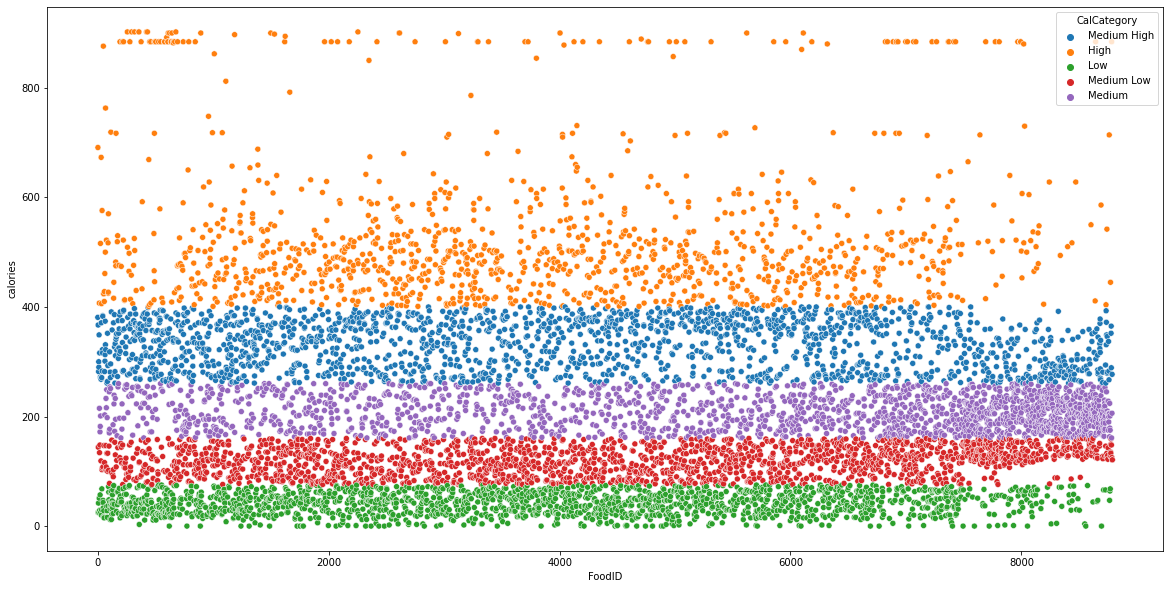

In [94]:
#Create scattorplot of calories grouping by their categories to show spread
plt.subplots(figsize = (20, 10))
sns.scatterplot(data = cal, x='FoodID', y='calories', hue='CalCategory')
plt.show()

In [302]:
#Finally. remove calories field for testing
cal = cal.loc[:, cal.columns != 'calories']

In [303]:
#Get counts of each category
new = sqldf('select count(*) as ct_cat, CalCategory  from cal group by CalCategory')
new

,ct_cat,CalCategory
0,1256,High
1,1841,Low
2,1829,Medium
3,1893,Medium High
4,1970,Medium Low


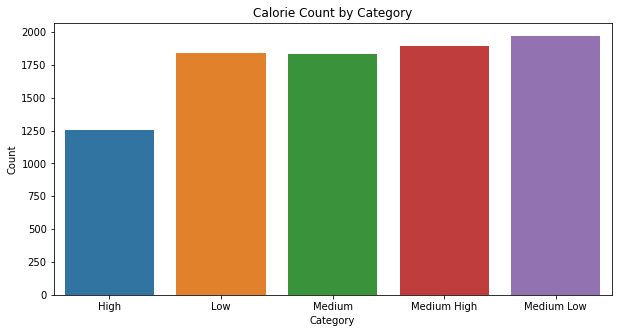

In [270]:
#Plot categories
X = new['CalCategory']
Y = new['ct_cat']

ax, fig = plt.subplots(figsize = (10, 5))
#plt.bar(X, Y)
sns.barplot(data = new, x = 'CalCategory', y = 'ct_cat')
plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Calorie Count by Category')
plt.show()


In [271]:
#Lets run some tests

In [304]:
#Create X and Y datasets for analysis (remove label field, food ID, and name of food)
X = cal.loc[:, cal.columns != 'CalCategory']
X = X.loc[:, X.columns != 'name']
X = X.loc[:, X.columns != 'FoodID']
Y = cal.loc[:, cal.columns == 'CalCategory']

In [305]:
#Split into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30)

In [274]:
#Create model
rf = RandomForestClassifier()

In [275]:
#Fit the model using training data
model5 = rf.fit(X_train, Y_train)

In [276]:
#Check trianing accuracy
print(model5.score(X_train, Y_train))

1.0


In [277]:
#Run preductions
Y_pred5 = model5.predict(X_test)

In [278]:
sqldf('select count(CalCategory) as ct, CalCategory from Y_test group by CalCategory')

,ct,CalCategory
0,360,High
1,531,Low
2,563,Medium
3,584,Medium High
4,599,Medium Low


In [279]:
#Check prediction score
print(accuracy_score(Y_test, Y_pred5))

0.9893818733409178


In [280]:
#Get confusion matrix
print(confusion_matrix(Y_test, Y_pred5))

[[350   0   0  10   0]
 [  0 530   0   0   1]
 [  0   0 549  11   3]
 [  1   0   1 582   0]
 [  0   0   1   0 598]]


In [281]:
#Confusion matrix but with labels
df = pd.DataFrame(
    confusion_matrix(Y_test, Y_pred5),
    index = ["High", "Low", "Medium", "Medium High", "Medium Low"], 
    columns = ["High", "Low", "Medium", "Medium High", "Medium Low"]
)
print(df)

             High  Low  Medium  Medium High  Medium Low
High          350    0       0           10           0
Low             0  530       0            0           1
Medium          0    0     549           11           3
Medium High     1    0       1          582           0
Medium Low      0    0       1            0         598


In [282]:
#print classification report
print(classification_report(Y_test, Y_pred5))

              precision    recall  f1-score   support

        High       1.00      0.97      0.98       360
         Low       1.00      1.00      1.00       531
      Medium       1.00      0.98      0.99       563
 Medium High       0.97      1.00      0.98       584
  Medium Low       0.99      1.00      1.00       599

    accuracy                           0.99      2637
   macro avg       0.99      0.99      0.99      2637
weighted avg       0.99      0.99      0.99      2637



In [ ]:
#We have a model that can predict calory category based on variables. 
#This can be used to see if combining different nutrient info will cause an increase in calory count or decrase
#Can use this model as a tracker for someone trying to lose weight

In [267]:
#Try a neural net

In [306]:
#Get max pixels
num_pixels = X_train.shape[1]
print(num_pixels)

#Get max number of categories
num_columns = 10
print(num_columns)

72
10


In [329]:
#Convert category field to int
newcal = cal

newcal = newcal.replace({'CalCategory':{"Low":"1"}})
newcal = newcal.replace({'CalCategory':{"Medium Low":"2"}})
newcal = newcal.replace({'CalCategory':{"Medium":"3"}})
newcal = newcal.replace({'CalCategory':{"Medium High":"4"}})
newcal = newcal.replace({'CalCategory':{"High":"5"}})

newcal['CalCategory'] = newcal['CalCategory'].astype(int)

In [330]:
newcal.head()

,FoodID,name,total_fat,saturated_fat,cholesterol,sodium,choline,folate,folic_acid,niacin,pantothenic_acid,riboflavin,thiamin,vitamin_a,vitamin_a_rae,carotene_alpha,carotene_beta,cryptoxanthin_beta,lutein_zeaxanthin,lucopene,vitamin_b12,vitamin_b6,vitamin_c,vitamin_d,vitamin_e,tocopherol_alpha,vitamin_k,calcium,copper,irom,magnesium,manganese,phosphorous,potassium,selenium,zink,protein,alanine,arginine,aspartic_acid,cystine,glutamic_acid,glycine,histidine,isoleucine,leucine,lysine,methionine,phenylalanine,proline,serine,threonine,tryptophan,tyrosine,valine,carbohydrate,fiber,sugars,fructose,galactose,glucose,lactose,maltose,sucrose,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water,CalCategory
0,0,Cornstarch,0.1,0.0,0.0,9.0,0.4,0.0,0.0,0.000,0.000,0.000,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.00,0.0,2.0,0.050,0.47,3.0,0.053,13.0,3.0,2.8,0.06,0.26,0.019,0.012,0.020,0.006,0.053,0.009,0.008,0.010,0.036,0.006,0.006,0.013,0.024,0.012,0.009,0.001,0.010,0.014,91.27,0.9,0.00,0.00,0.0,0.00,0.0,0.00,0.00,0.05,0.009,0.016,0.025,0.0,0.0,0.09,0.0,0.0,8.32,4
1,1,"Nuts, pecans",72.0,6.2,0.0,0.0,40.5,22.0,0.0,1.167,0.863,0.130,0.660,56.0,3.0,0.0,29.0,9.0,17.0,0.0,0.00,6.2,6.2,6.2,6.2,1.40,3.5,70.0,1.200,2.53,121.0,4.500,277.0,410.0,3.8,4.53,9.17,0.397,1.177,0.929,0.152,1.829,0.453,0.262,0.336,0.598,0.287,0.183,0.426,0.363,0.474,0.306,0.093,0.215,0.411,13.86,9.6,3.97,0.04,0.0,0.04,0.0,0.00,3.90,71.97,6.180,40.801,21.614,0.0,0.0,1.49,0.0,0.0,3.52,5
2,2,"Eggplant, raw",0.2,0.0,0.0,2.0,6.9,22.0,0.0,0.649,0.281,0.037,0.039,23.0,1.0,0.0,14.0,0.0,36.0,0.0,0.00,0.0,0.0,0.0,0.0,0.30,3.5,9.0,0.081,0.23,14.0,0.232,24.0,229.0,0.3,0.16,0.98,0.051,0.057,0.164,0.006,0.186,0.041,0.023,0.045,0.064,0.047,0.011,0.043,0.043,0.042,0.037,0.009,0.027,0.053,5.88,3.0,3.53,1.54,0.0,1.58,0.0,0.00,0.26,0.18,0.034,0.016,0.076,0.0,0.0,0.66,0.0,0.0,92.30,1
3,3,"Teff, uncooked",2.4,0.4,0.0,12.0,13.1,0.0,0.0,3.363,0.942,0.270,0.390,9.0,0.0,0.0,5.0,0.0,66.0,0.0,0.00,0.4,0.4,0.4,0.4,0.08,1.9,180.0,0.810,7.63,184.0,9.240,429.0,427.0,4.4,3.63,13.30,0.747,0.517,0.820,0.236,3.349,0.477,0.301,0.501,1.068,0.376,0.428,0.698,0.664,0.622,0.510,0.139,0.458,0.686,73.13,8.0,1.84,0.47,0.0,0.73,0.0,0.01,0.62,2.38,0.449,0.589,1.071,0.0,0.0,2.37,0.0,0.0,8.82,4
4,4,"Sherbet, orange",2.0,1.2,1.0,46.0,7.7,4.0,0.0,0.063,0.224,0.097,0.027,46.0,12.0,0.0,1.0,5.0,7.0,0.0,0.13,1.2,1.2,1.2,1.2,0.01,0.0,54.0,0.028,0.14,8.0,0.011,40.0,96.0,1.5,0.48,1.10,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,0.000,30.40,1.3,24.32,0.00,0.0,0.00,0.0,0.00,0.00,2.00,1.160,0.530,0.080,1.0,0.0,0.40,0.0,0.0,66.10,2


In [331]:
#Create X and Y datasets for analysis (remove label field, food ID, and name of food)
X = newcal.loc[:, newcal.columns != 'CalCategory']
X = X.loc[:, X.columns != 'name']
X = X.loc[:, X.columns != 'FoodID']
Y = newcal.loc[:, newcal.columns == 'CalCategory']

In [332]:
#split into training and testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.30)

In [333]:
#create sequantial neural nett model
seq = Sequential()

In [334]:
#Add layers to model
seq.add(Dense(num_pixels, input_dim = num_pixels, kernel_initializer = "normal", activation = "relu"))
seq.add(Dense(num_columns, kernel_initializer = "normal", activation = "softmax"))

seq.compile(loss = "sparse_categorical_crossentropy", optimizer = "adam", metrics = ["accuracy"])

In [335]:
#Run model and get run time
start = time.time()

results = seq.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=100, batch_size=200, verbose=2)

end = time.time()

Epoch 1/100
31/31 - 4s - loss: 6.0112 - accuracy: 0.3896 - val_loss: 2.8306 - val_accuracy: 0.4918
Epoch 2/100
31/31 - 0s - loss: 1.8492 - accuracy: 0.5878 - val_loss: 1.6149 - val_accuracy: 0.5628
Epoch 3/100
31/31 - 0s - loss: 1.3523 - accuracy: 0.6482 - val_loss: 1.5213 - val_accuracy: 0.6651
Epoch 4/100
31/31 - 0s - loss: 1.3735 - accuracy: 0.6739 - val_loss: 1.3166 - val_accuracy: 0.6564
Epoch 5/100
31/31 - 0s - loss: 1.2128 - accuracy: 0.7025 - val_loss: 1.3900 - val_accuracy: 0.6989
Epoch 6/100
31/31 - 0s - loss: 1.1285 - accuracy: 0.7243 - val_loss: 1.1374 - val_accuracy: 0.7364
Epoch 7/100
31/31 - 0s - loss: 1.1175 - accuracy: 0.7458 - val_loss: 1.3043 - val_accuracy: 0.7053
Epoch 8/100
31/31 - 0s - loss: 1.2197 - accuracy: 0.7302 - val_loss: 1.2299 - val_accuracy: 0.7516
Epoch 9/100
31/31 - 0s - loss: 1.1181 - accuracy: 0.7572 - val_loss: 1.2122 - val_accuracy: 0.7751
Epoch 10/100
31/31 - 0s - loss: 0.8569 - accuracy: 0.7713 - val_loss: 1.2810 - val_accuracy: 0.7865
Epoch 11/

31/31 - 0s - loss: 0.3154 - accuracy: 0.9369 - val_loss: 0.5652 - val_accuracy: 0.9101
Epoch 84/100
31/31 - 0s - loss: 0.2539 - accuracy: 0.9421 - val_loss: 0.4013 - val_accuracy: 0.9124
Epoch 85/100
31/31 - 0s - loss: 0.2197 - accuracy: 0.9475 - val_loss: 0.3552 - val_accuracy: 0.9245
Epoch 86/100
31/31 - 0s - loss: 0.1370 - accuracy: 0.9566 - val_loss: 0.3246 - val_accuracy: 0.9310
Epoch 87/100
31/31 - 0s - loss: 0.1441 - accuracy: 0.9550 - val_loss: 0.3729 - val_accuracy: 0.9302
Epoch 88/100
31/31 - 0s - loss: 0.1490 - accuracy: 0.9486 - val_loss: 0.4450 - val_accuracy: 0.9090
Epoch 89/100
31/31 - 0s - loss: 0.1670 - accuracy: 0.9548 - val_loss: 0.3270 - val_accuracy: 0.9245
Epoch 90/100
31/31 - 0s - loss: 0.1624 - accuracy: 0.9576 - val_loss: 0.4363 - val_accuracy: 0.9170
Epoch 91/100
31/31 - 0s - loss: 0.1477 - accuracy: 0.9520 - val_loss: 0.4066 - val_accuracy: 0.9135
Epoch 92/100
31/31 - 0s - loss: 0.1341 - accuracy: 0.9629 - val_loss: 0.3467 - val_accuracy: 0.9264
Epoch 93/100


In [ ]:
#Highest acccuracy was 0.9317

In [336]:
finaltime = end - start
print("Total Compute Time:", finaltime)

Total Compute Time: 16.55213499069214


In [337]:
#Get metrics from model
pred_accuracy = results.history['val_accuracy']
traning_accuracy = results.history['accuracy']
epochs = range(0, len(traning_accuracy))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


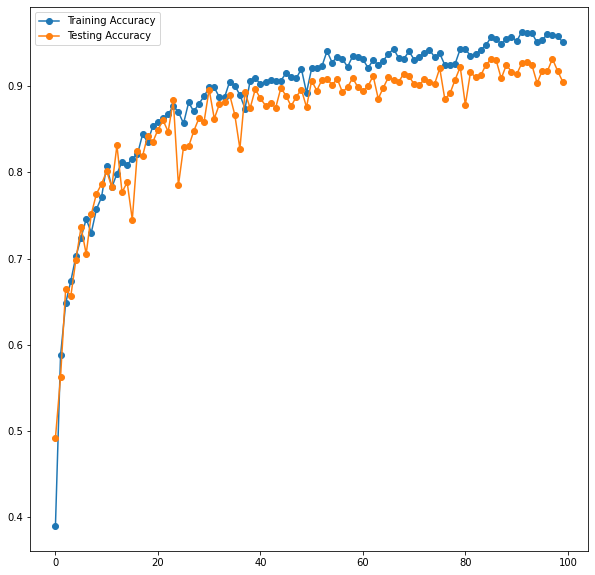

In [338]:
#plot training and testing over iterations
fig, ax = plt.subplots(figsize = (10, 10))
plt.plot(epochs, traning_accuracy, marker = 'o')
plt.plot(epochs, pred_accuracy, marker = 'o')
plt.legend()
plt.legend(['Training Accuracy', 'Testing Accuracy'])